## **Music Similiarity Based on Euclidean Distance**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [2]:
music_data = pd.read_csv('df_audio_features_10.csv')
music_data

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4,4XHQyvbrBsQaaBUW1VvmsL,https://open.spotify.com/track/4XHQyvbrBsQaaBU...
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4,3yfqSUWxFvZELEM4PmlwIR,https://open.spotify.com/track/3yfqSUWxFvZELEM...
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4,1y7OxO5i6sfrHXAmUM77YG,https://open.spotify.com/track/1y7OxO5i6sfrHXA...
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4,3898C4AbdbptwYet6547e5,https://open.spotify.com/track/3898C4AbdbptwYe...
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4,63T7DJ1AFDD6Bn8VzG6JE8,https://open.spotify.com/track/63T7DJ1AFDD6Bn8...
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4,6cr6UDpkjEaMQ80OjWqEBQ,https://open.spotify.com/track/6cr6UDpkjEaMQ80...
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4,4F8OK7mNa51mKqgHqWQiYm,https://open.spotify.com/track/4F8OK7mNa51mKqg...
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4,2vfSCFvMbpf4hwxt22Wx7b,https://open.spotify.com/track/2vfSCFvMbpf4hwx...
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3,59cPOVxrn3Yjwydl1pullI,https://open.spotify.com/track/59cPOVxrn3Yjwyd...
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4,7n92QzQomRCLlciO14X0kd,https://open.spotify.com/track/7n92QzQomRCLlci...


In [3]:
music_data = music_data.drop(['id', 'html'], axis=1)
music_data

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,My Band,D12,0.851,0.84900,1,-3.383,0,0.0828,0.49700,0.000002,0.1160,0.8440,120.014,298773,4
1,The Real Slim Shady,Eminem,0.949,0.66100,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.7600,104.504,284200,4
2,Águas De Março,Antônio Carlos Jobim,0.642,0.33900,3,-15.503,1,0.1400,0.85400,0.000000,0.1050,0.4910,143.418,212400,4
3,The Girl From Ipanema,Stan Getz,0.641,0.14000,8,-16.790,1,0.0390,0.86700,0.001660,0.1050,0.3880,129.318,317987,4
4,"Paint It, Black",The Rolling Stones,0.464,0.79500,1,-9.267,1,0.0926,0.04930,0.002440,0.3990,0.6120,158.691,202267,4
5,Sultans Of Swing,Dire Straits,0.733,0.79400,5,-10.023,1,0.0307,0.06140,0.036700,0.3300,0.9310,148.174,348624,4
6,Space Raiders - Charlotte de Witte Remix,Eats Everything,0.749,0.73100,4,-10.865,1,0.1080,0.00314,0.867000,0.1110,0.0598,131.997,438720,4
7,In Silence,Amelie Lens,0.736,0.84500,1,-12.017,1,0.0377,0.00548,0.901000,0.1110,0.1980,128.009,393740,4
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",Johannes Brahms,0.184,0.00833,3,-33.503,1,0.0519,0.98900,0.596000,0.1040,0.2110,61.541,109800,3
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,Frédéric Chopin,0.387,0.04510,3,-24.698,1,0.0364,0.99000,0.913000,0.1120,0.0710,61.494,268427,4


In [4]:
# Define a min-max scaling function
def min_max_scaling(col): 
    min_col = min(col)
    max_col = max(col)
    norm_val = []    
    for val in col: 
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [5]:
music_data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.633600,0.520743,3.400000,-14.029300,0.800000,0.067630,0.434652,0.331780,0.153840,0.456580,118.716000,287493.800000,3.900000
std,0.229072,0.348562,2.221111,9.217901,0.421637,0.036715,0.447731,0.428544,0.114019,0.321551,33.661904,96496.252263,0.316228
min,0.184000,0.008330,1.000000,-33.503000,0.000000,0.030700,0.003140,0.000000,0.045400,0.059800,61.494000,109800.000000,3.000000
25%,0.508250,0.189750,1.500000,-16.468250,1.000000,0.038025,0.034975,0.000417,0.105000,0.201250,108.381500,226406.750000,4.000000
50%,0.687500,0.696000,3.000000,-11.441000,1.000000,0.054550,0.279200,0.019570,0.111000,0.439500,128.663500,291486.500000,4.000000
75%,0.745750,0.794750,4.750000,-9.456000,1.000000,0.090150,0.863750,0.799250,0.115000,0.723000,140.562750,340964.750000,4.000000
max,0.949000,0.849000,8.000000,-3.383000,1.000000,0.140000,0.990000,0.913000,0.399000,0.931000,158.691000,438720.000000,4.000000


In [6]:
# Define the euclidean distance function.
def get_distances(df):
    return pd.DataFrame(pairwise_distances(df), index=df.index, columns=df.index)

In [7]:
# Drop column key
# keep mode, time signature
# Apply min_max_scaling to duration, tempo, liveness, loudness, speechiness, duration
# danceability, energy, acousticness, instrumentalness, valence 

In [8]:
music_data1 = music_data.drop(['key'], axis=1)[['duration_ms', 'tempo', 'liveness', 'loudness', 'speechiness']]
music_data2 = music_data.drop(['artist', 'key','duration_ms', 'tempo', 'liveness', 'loudness', 'speechiness'], axis=1)

In [9]:
music_data1

,duration_ms,tempo,liveness,loudness,speechiness
0,298773,120.014,0.1160,-3.383,0.0828
1,284200,104.504,0.0454,-4.244,0.0572
2,212400,143.418,0.1050,-15.503,0.1400
3,317987,129.318,0.1050,-16.790,0.0390
4,202267,158.691,0.3990,-9.267,0.0926
5,348624,148.174,0.3300,-10.023,0.0307
6,438720,131.997,0.1110,-10.865,0.1080
7,393740,128.009,0.1110,-12.017,0.0377
8,109800,61.541,0.1040,-33.503,0.0519
9,268427,61.494,0.1120,-24.698,0.0364


In [10]:
music_data2

,song_name,danceability,energy,mode,acousticness,instrumentalness,valence,time_signature
0,My Band,0.851,0.84900,0,0.49700,0.000002,0.8440,4
1,The Real Slim Shady,0.949,0.66100,0,0.03020,0.000000,0.7600,4
2,Águas De Março,0.642,0.33900,1,0.85400,0.000000,0.4910,4
3,The Girl From Ipanema,0.641,0.14000,1,0.86700,0.001660,0.3880,4
4,"Paint It, Black",0.464,0.79500,1,0.04930,0.002440,0.6120,4
5,Sultans Of Swing,0.733,0.79400,1,0.06140,0.036700,0.9310,4
6,Space Raiders - Charlotte de Witte Remix,0.749,0.73100,1,0.00314,0.867000,0.0598,4
7,In Silence,0.736,0.84500,1,0.00548,0.901000,0.1980,4
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,1,0.98900,0.596000,0.2110,3
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,0.387,0.04510,1,0.99000,0.913000,0.0710,4


In [11]:
# Apply the min_max_scaling function to music_data1 and concatenate with music_data2.
music_data_adj = pd.concat([music_data2, music_data1.apply(min_max_scaling)], axis=1)
music_data_adj

,song_name,danceability,energy,mode,acousticness,instrumentalness,valence,time_signature,duration_ms,tempo,liveness,loudness,speechiness
0,My Band,0.851,0.84900,0,0.49700,0.000002,0.8440,4,0.574526,0.602076,0.199661,1.000000,0.476670
1,The Real Slim Shady,0.949,0.66100,0,0.03020,0.000000,0.7600,4,0.530220,0.442503,0.000000,0.971414,0.242452
2,Águas De Março,0.642,0.33900,1,0.85400,0.000000,0.4910,4,0.311930,0.842866,0.168552,0.597610,1.000000
3,The Girl From Ipanema,0.641,0.14000,1,0.86700,0.001660,0.3880,4,0.632941,0.697799,0.168552,0.554880,0.075938
4,"Paint It, Black",0.464,0.79500,1,0.04930,0.002440,0.6120,4,0.281123,1.000000,1.000000,0.804648,0.566331
5,Sultans Of Swing,0.733,0.79400,1,0.06140,0.036700,0.9310,4,0.726085,0.891797,0.804864,0.779548,0.000000
6,Space Raiders - Charlotte de Witte Remix,0.749,0.73100,1,0.00314,0.867000,0.0598,4,1.000000,0.725362,0.185520,0.751594,0.707228
7,In Silence,0.736,0.84500,1,0.00548,0.901000,0.1980,4,0.863249,0.684332,0.185520,0.713347,0.064044
8,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,1,0.98900,0.596000,0.2110,3,0.000000,0.000484,0.165724,0.000000,0.193962
9,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,0.387,0.04510,1,0.99000,0.913000,0.0710,4,0.482266,0.000000,0.188348,0.292331,0.052150


In [12]:
music_data_adj.index = music_data_adj.song_name.tolist()
music_data_adj

,song_name,danceability,energy,mode,acousticness,instrumentalness,valence,time_signature,duration_ms,tempo,liveness,loudness,speechiness
My Band,My Band,0.851,0.84900,0,0.49700,0.000002,0.8440,4,0.574526,0.602076,0.199661,1.000000,0.476670
The Real Slim Shady,The Real Slim Shady,0.949,0.66100,0,0.03020,0.000000,0.7600,4,0.530220,0.442503,0.000000,0.971414,0.242452
Águas De Março,Águas De Março,0.642,0.33900,1,0.85400,0.000000,0.4910,4,0.311930,0.842866,0.168552,0.597610,1.000000
The Girl From Ipanema,The Girl From Ipanema,0.641,0.14000,1,0.86700,0.001660,0.3880,4,0.632941,0.697799,0.168552,0.554880,0.075938
"Paint It, Black","Paint It, Black",0.464,0.79500,1,0.04930,0.002440,0.6120,4,0.281123,1.000000,1.000000,0.804648,0.566331
Sultans Of Swing,Sultans Of Swing,0.733,0.79400,1,0.06140,0.036700,0.9310,4,0.726085,0.891797,0.804864,0.779548,0.000000
Space Raiders - Charlotte de Witte Remix,Space Raiders - Charlotte de Witte Remix,0.749,0.73100,1,0.00314,0.867000,0.0598,4,1.000000,0.725362,0.185520,0.751594,0.707228
In Silence,In Silence,0.736,0.84500,1,0.00548,0.901000,0.1980,4,0.863249,0.684332,0.185520,0.713347,0.064044
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]","Wiegenlied, Op. 49, No. 4 (Arr. for Cello and ...",0.184,0.00833,1,0.98900,0.596000,0.2110,3,0.000000,0.000484,0.165724,0.000000,0.193962
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,Nocturne en mi bémol majeur opus 9 n°2: Ballad...,0.387,0.04510,1,0.99000,0.913000,0.0710,4,0.482266,0.000000,0.188348,0.292331,0.052150


In [13]:
music_data_adj = music_data_adj.drop(['song_name'], axis=1)
music_data_adj

,danceability,energy,mode,acousticness,instrumentalness,valence,time_signature,duration_ms,tempo,liveness,loudness,speechiness
My Band,0.851,0.84900,0,0.49700,0.000002,0.8440,4,0.574526,0.602076,0.199661,1.000000,0.476670
The Real Slim Shady,0.949,0.66100,0,0.03020,0.000000,0.7600,4,0.530220,0.442503,0.000000,0.971414,0.242452
Águas De Março,0.642,0.33900,1,0.85400,0.000000,0.4910,4,0.311930,0.842866,0.168552,0.597610,1.000000
The Girl From Ipanema,0.641,0.14000,1,0.86700,0.001660,0.3880,4,0.632941,0.697799,0.168552,0.554880,0.075938
"Paint It, Black",0.464,0.79500,1,0.04930,0.002440,0.6120,4,0.281123,1.000000,1.000000,0.804648,0.566331
Sultans Of Swing,0.733,0.79400,1,0.06140,0.036700,0.9310,4,0.726085,0.891797,0.804864,0.779548,0.000000
Space Raiders - Charlotte de Witte Remix,0.749,0.73100,1,0.00314,0.867000,0.0598,4,1.000000,0.725362,0.185520,0.751594,0.707228
In Silence,0.736,0.84500,1,0.00548,0.901000,0.1980,4,0.863249,0.684332,0.185520,0.713347,0.064044
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",0.184,0.00833,1,0.98900,0.596000,0.2110,3,0.000000,0.000484,0.165724,0.000000,0.193962
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,0.387,0.04510,1,0.99000,0.913000,0.0710,4,0.482266,0.000000,0.188348,0.292331,0.052150


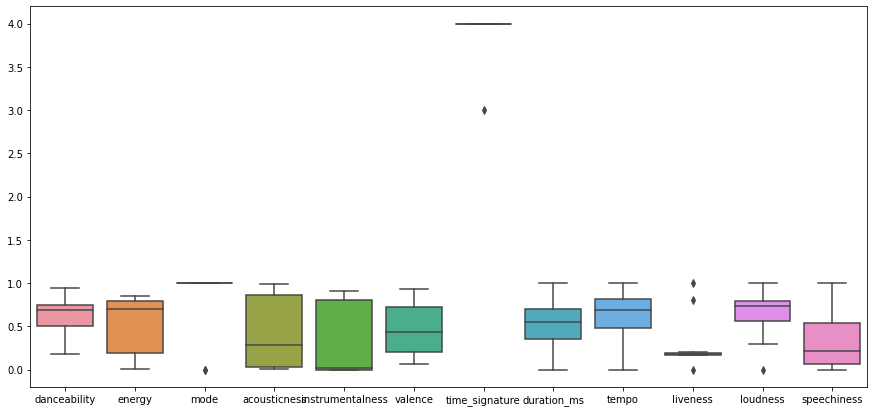

In [14]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=music_data_adj)
plt.show();

In [17]:
get_distances(music_data_adj)

,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
My Band,0.000000,0.626795,1.455862,1.504620,1.529092,1.401644,1.716441,1.681280,2.433650,2.141925
The Real Slim Shady,0.626795,0.000000,1.702616,1.584390,1.667638,1.442060,1.699135,1.584209,2.457050,2.157692
Águas De Março,1.455862,1.702616,0.000000,1.014984,1.360033,1.627999,1.556811,1.761048,1.893330,1.706256
The Girl From Ipanema,1.504620,1.584390,1.014984,0.000000,1.545458,1.374298,1.592712,1.473751,1.683548,1.264594
"Paint It, Black",1.529092,1.667638,1.360033,1.545458,0.000000,0.862891,1.555022,1.555549,2.377730,2.191138
Sultans Of Swing,1.401644,1.442060,1.627999,1.374298,0.862891,0.000000,1.563098,1.320594,2.446588,2.127277
Space Raiders - Charlotte de Witte Remix,1.716441,1.699135,1.556811,1.592712,1.555022,1.563098,0.000000,0.684805,2.294314,1.735480
In Silence,1.681280,1.584209,1.761048,1.473751,1.555549,1.320594,0.684805,0.000000,2.191850,1.593128
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",2.433650,2.457050,1.893330,1.683548,2.377730,2.446588,2.294314,2.191850,0.000000,1.225280
Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1,2.141925,2.157692,1.706256,1.264594,2.191138,2.127277,1.735480,1.593128,1.225280,0.000000


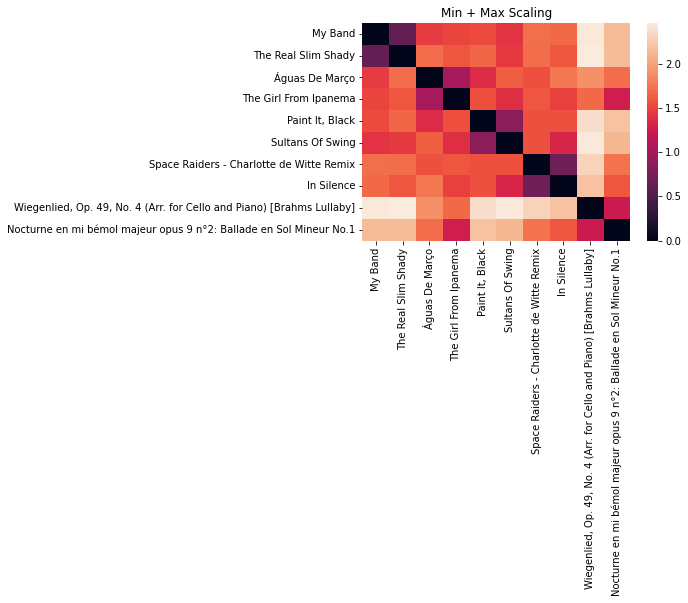

In [16]:
sns.heatmap(get_distances(music_data_adj))
plt.title('Min + Max Scaling')
plt.show()